### Apply a feature extraction method (PCA) and examine a classifier with and without this technique

In [4]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing  import StandardScaler
from sklearn.datasets   import  load_breast_cancer
from sklearn.model_selection import  train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [5]:
cancer = load_breast_cancer()
XX = cancer.data
yy = cancer.target
print((np.unique(cancer.target)))
print(XX.shape)
print(yy.shape)

[0 1]
(569, 30)
(569,)


In [6]:
def plot_class_samples(X, y):
    
    markers = ('o', 's')
    colors = ('red', 'blue')
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 23], 
                    y=X[y == cl, 26],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

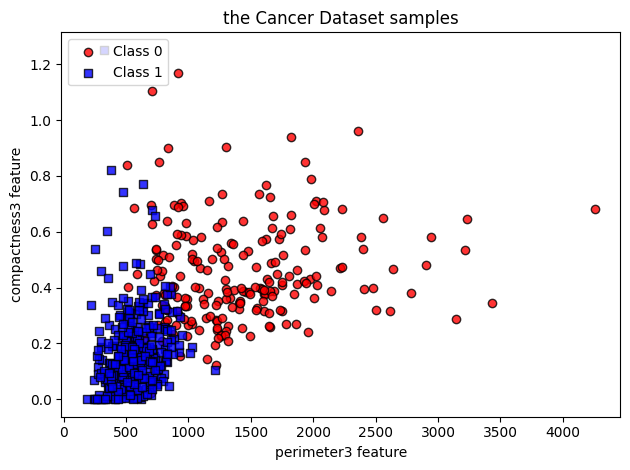

In [7]:
plot_class_samples (X=XX,  y=yy)

plt.title('the Cancer Dataset samples')
plt.legend(loc='upper left')
plt.xlabel('perimeter3 feature')
plt.ylabel('compactness3 feature')
plt.tight_layout()
plt.savefig('./feature _extraction_PCA_img/cancer_dataset.png', dpi=300)
plt.show()

#### Exemine influence of standardization on feature extraction methods and accuracy of the a classifier 

In [8]:
sc = StandardScaler()
sc.fit(XX)   
XX_std = sc.transform(XX) 

ppca = PCA(n_components=2)
XX_pca = ppca.fit_transform(XX_std)

print(XX_pca.shape)


(569, 2)


In [9]:
def plot_class_samples(X, y):
    
    markers = ('o', 's')
    colors = ('red', 'blue')
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

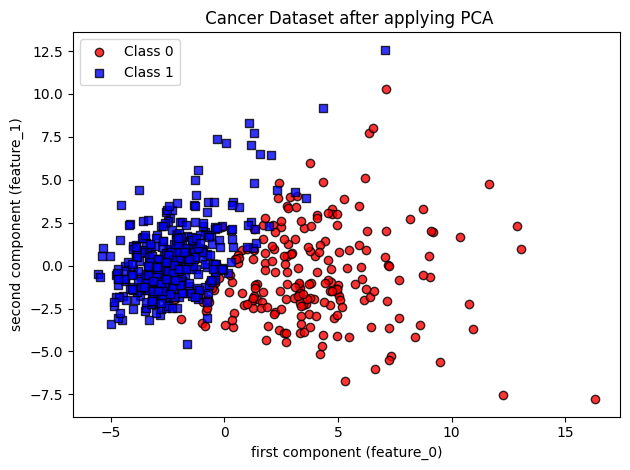

In [10]:
plot_class_samples (X=XX_pca,  y=yy)

plt.title(' Cancer Dataset after applying PCA')
plt.xlabel('first component (feature_0)')
plt.ylabel('second component (feature_1)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./feature _extraction_PCA_img/cancer_dataset_with_projection.png', dpi=300)
plt.show()

In [11]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train , X_test ,Y_train , Y_test = train_test_split(X , y , test_size=0.3, random_state=1, stratify=y )
#the stratify parameter ensures that the training and testing sets have the same proportion of classes (or labels) as the original dataset. 
print((np.unique(cancer.target)))
print(X.shape)
print(y.shape)

[0 1]
(569, 30)
(569,)


In [12]:
sc = StandardScaler()
sc.fit(X_train)   # to calculate avarage and variance of all features
X_train_std = sc.transform(X_train) # apply transformation according previouse calculation step
X_test_std = sc.transform(X_test)

print(X_train_std.shape)
print(X_test_std.shape)

(398, 30)
(171, 30)


In [13]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print(X_train_pca.shape)
print(X_test_pca.shape)

(398, 2)
(171, 2)


In [14]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.
    """
    def __init__(self, learning_rate=0.1, n_iter=1000, random_state=1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.learning_rate * X.T.dot(errors) / X.shape[0]
            self.b_ += self.learning_rate * errors.mean()
            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
       
    def accuracy_score(self , x_test, y_test):
        
     score= [ 1  if pred==tst else 0   for pred,tst in zip( self.predict(x_test), y_test) ]
     return  np.round(np.sum(score)/len(y_test)  , 3)
 
 
    def predict_proba(self, X):
        
        net_input = self.net_input(X)
        probability_positive_class = self.activation(net_input)
        probability_negative_class = 1 - probability_positive_class
        return np.column_stack((probability_negative_class, probability_positive_class))
        
        

In [15]:
logisticregression_gd = LogisticRegressionGD(learning_rate=0.1, n_iter=500, random_state=1)
logisticregression_gd.fit(X_train_pca,Y_train)

In [16]:
def plot_class_samples(X, y):
    
    markers = ('o', 's')
    colors = ('red', 'blue')

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')
      

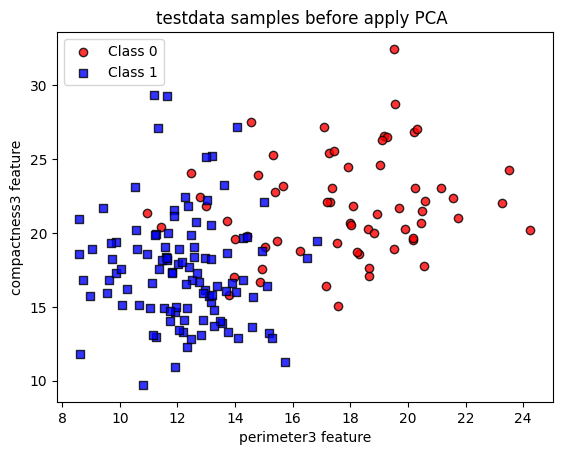

In [17]:
plot_class_samples (X=X_test,  y=Y_test)
plt.title('testdata samples before apply PCA ')
plt.legend(loc='upper left')
plt.xlabel('perimeter3 feature')
plt.ylabel('compactness3 feature')
plt.savefig('./feature _extraction_PCA_img/testdata sapmles.png', dpi=300)
plt.show()

In [18]:

print('\nto check probability of some test data:\n\n   class_0_prob   class_1_prob\n' ,logisticregression_gd.predict_proba(X_test_pca[:5 , :]) )


to check probability of some test data:

   class_0_prob   class_1_prob
 [[9.99999577e-01 4.23207221e-07]
 [2.14857029e-01 7.85142971e-01]
 [2.46171547e-04 9.99753828e-01]
 [9.99987736e-01 1.22637357e-05]
 [9.77609803e-01 2.23901974e-02]]


In [19]:
print('\ncheck to sum of probability on axis=1 is equal to 1\n\n' ,logisticregression_gd.predict_proba(X_test_pca[:5, :]).sum(axis=1))


check to sum of probability on axis=1 is equal to 1

 [1. 1. 1. 1. 1.]


In [20]:
print('\nsee some pridiction for test data\n\n',  logisticregression_gd.predict(X_test_pca[:5,:]))


see some pridiction for test data

 [0 1 1 0 0]


In [21]:
print('\nreturn class with higher probability \n\n', logisticregression_gd.predict_proba(X_test_pca[:5, :]).argmax(axis=1))


return class with higher probability 

 [0 1 1 0 0]


In [22]:
print(f"accuracy for training data is: {logisticregression_gd.accuracy_score((X_train_pca), Y_train)}")
print(f"accuracy for test data is: {logisticregression_gd.accuracy_score(X_test_pca, Y_test)}")

accuracy for training data is: 0.962
accuracy for test data is: 0.947


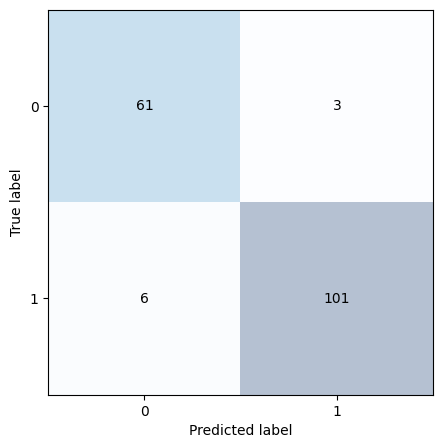

In [27]:
y_pred_LR_gb = logisticregression_gd.predict(X_test_pca[:5,:])
confmat = confusion_matrix(y_true=Y_test, y_pred=logisticregression_gd.predict(X_test_pca))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        

ax.xaxis.set_ticks_position('bottom')  
plt.xlabel('Predicted label') 
plt.ylabel('True label')
plt.savefig('./feature _extraction_PCA_img/confusion matrix for logisticregression_gd classsifier.png', dpi=300)
plt.show()

In [ ]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('o', 's')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')
   

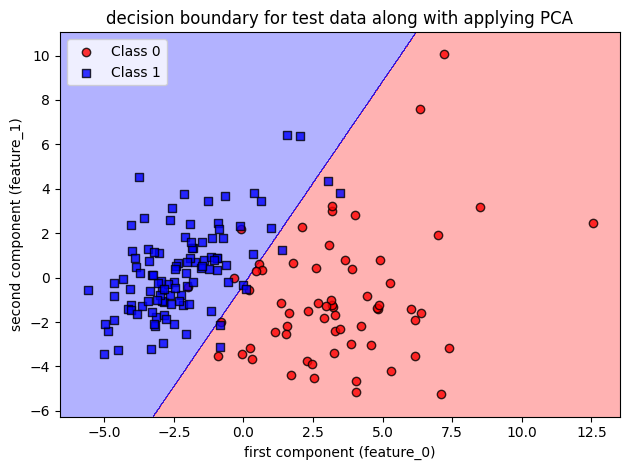

In [ ]:
plot_decision_regions(X=X_test_pca, y=Y_test, classifier=logisticregression_gd  )
plt.title('decision boundary for test data along with applying PCA')
plt.xlabel('first component (feature_0)')
plt.ylabel('second component (feature_1)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./feature _extraction_PCA_img/decision boundary for test data(pure python implementation).png', dpi=300)
plt.show()

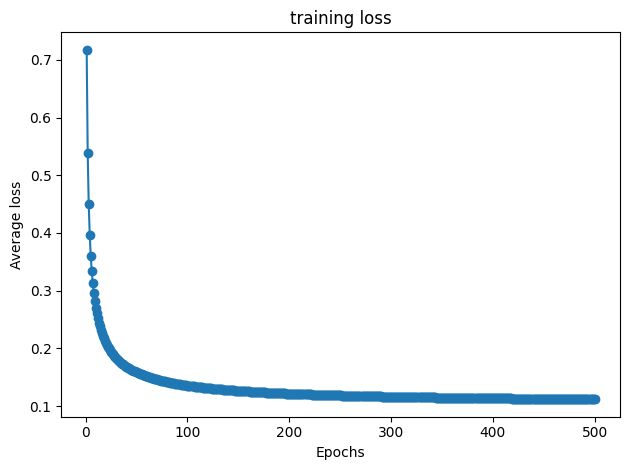

In [ ]:
plt.plot(range(1, len(logisticregression_gd.losses_) + 1), logisticregression_gd.losses_, marker='o')
plt.title('training loss')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.savefig('./feature _extraction_PCA_img/training loss curve.png', dpi=300)
plt.show()